In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



In [4]:
df=pd.read_csv('retail_sales_dataset.csv')

In [6]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
missing_values = df.isnull().sum()

# Remove duplicates
df = df.drop_duplicates()

# Validate 'Total Amount' = Quantity * Price per Unit
df['Computed Total'] = df['Quantity'] * df['Price per Unit']
df['Mismatch'] = df['Total Amount'] != df['Computed Total']
df = df[~df['Mismatch']]  # Drop mismatches if needed
df.drop(['Computed Total', 'Mismatch'], axis=1, inplace=True)


In [12]:
# Extract month and weekday from date
df['Month'] = df['Date'].dt.month_name()
df['Weekday'] = df['Date'].dt.day_name()

# Create age group bins
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100],
                         labels=['Teen', 'Young Adult', 'Adult', 'Mid-age', 'Senior'])

# Calculate running monthly total
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()
print("Montly sales: ",monthly_sales)

Montly sales:  Date
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64


In [15]:
# Mean and standard deviation of quantities and prices
mean_qty = np.mean(df['Quantity'])
std_qty = np.std(df['Quantity'])
mean_price = np.mean(df['Price per Unit'])
max_sale = np.max(df['Total Amount'])

# Correlation matrix
correlation = df[['Quantity', 'Price per Unit', 'Total Amount']].corr()
print("correlation of Quantity, Price and Total Amount:\n ",correlation )

correlation of Quantity, Price and Total Amount:
                  Quantity  Price per Unit  Total Amount
Quantity        1.000000        0.017501      0.373707
Price per Unit  0.017501        1.000000      0.851925
Total Amount    0.373707        0.851925      1.000000


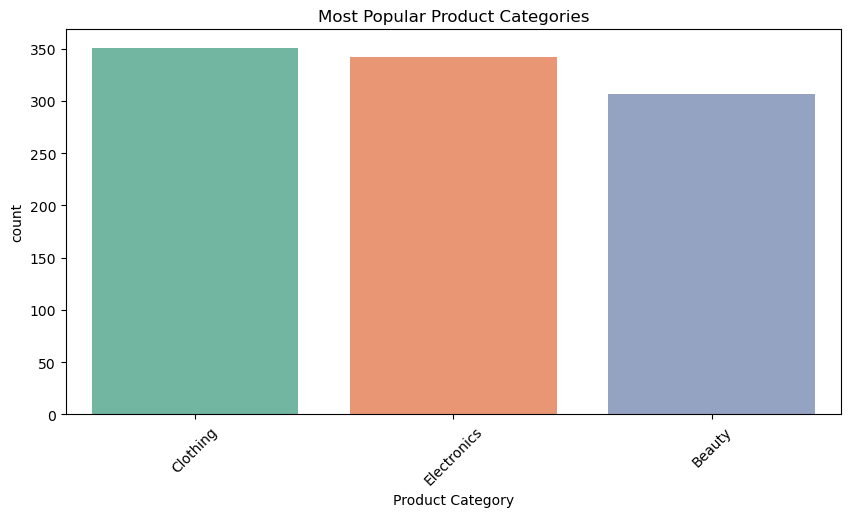

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Product Category', order=df['Product Category'].value_counts().index, palette='Set2')
plt.title('Most Popular Product Categories')
plt.xticks(rotation=45)
plt.show()


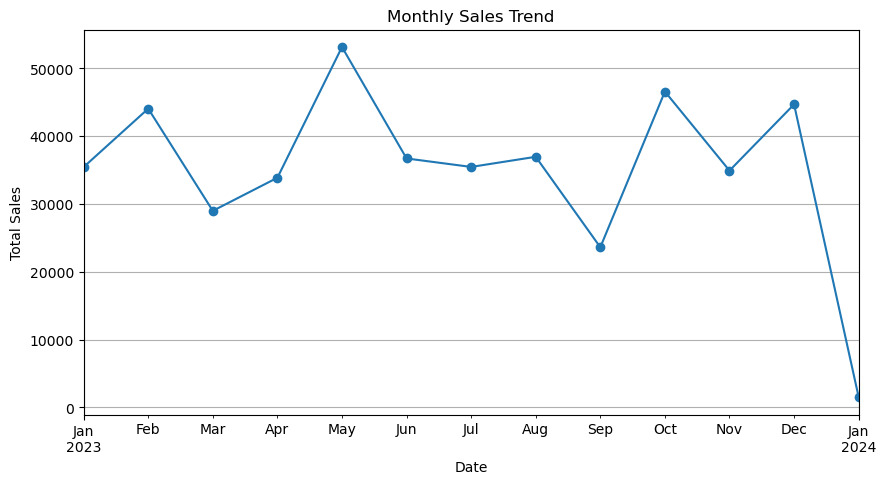

In [16]:
#Monthly sales Trends
monthly = df.groupby(df['Date'].dt.to_period("M")).sum(numeric_only=True)['Total Amount']

monthly.plot(kind='line', marker='o', figsize=(10,5), title='Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


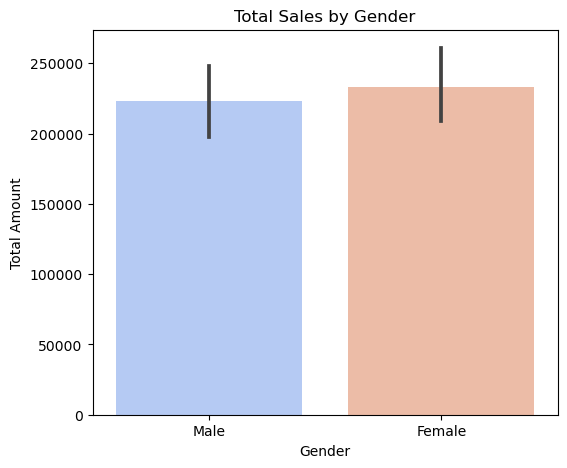

In [18]:
#Gender wise Spending 
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='Gender', y='Total Amount', estimator=sum, palette='coolwarm')
plt.title('Total Sales by Gender')
plt.show()



C:\Users\Manthan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


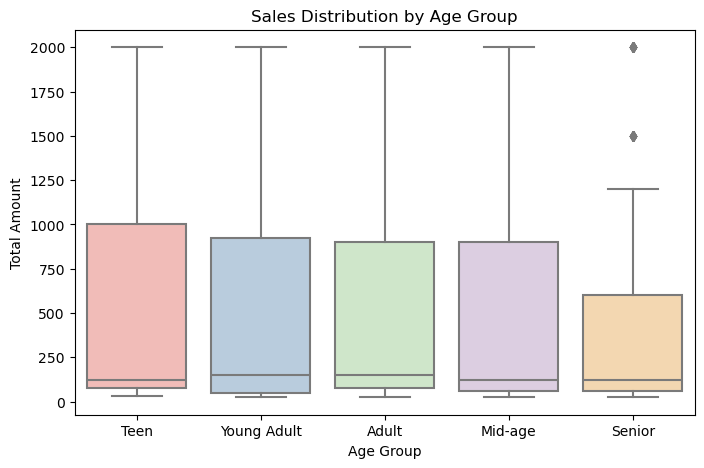

In [21]:
#Sales Distribution by Age Group
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Age Group', y='Total Amount', palette='Pastel1')
plt.title('Sales Distribution by Age Group')
plt.show()


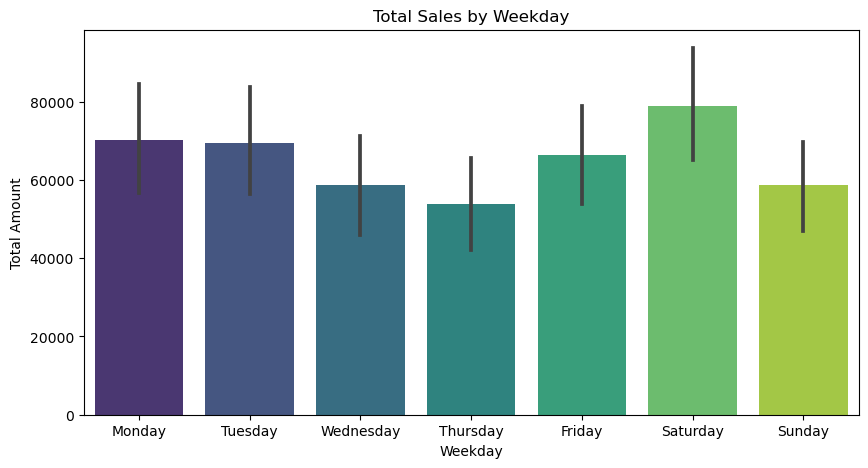

In [25]:
#Total sales by Weekday
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Weekday', y='Total Amount', estimator=sum,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            palette='viridis')
plt.title('Total Sales by Weekday')
plt.show()
